In [22]:
import fitsio
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from time import time

In [2]:
targets_path = "/global/cfs/projectdirs/desi/target/catalogs/dr8/0.42.0/targets/main/resolve/dark"
filename = os.path.join(targets_path, "targets-dark-hp-9.fits")


columns = ['TARGETID', 'DESI_TARGET', 'MWS_TARGET', 
           'BGS_TARGET', 'SUBPRIORITY', 'NUMOBS_INIT', 
           'PRIORITY_INIT', 'RA', 'DEC', 'HPXPIXEL', 
           'BRICKNAME', 'FLUX_R', 'FLUX_G', 'FLUX_Z',
           'MW_TRANSMISSION_G','MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z']
filein = fitsio.FITS(filename)
data = filein[1].read(columns=columns)

In [18]:
len(data)

3416317

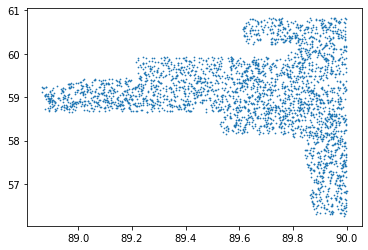

In [5]:
"""r = np.random.random(len(data))
rr = r<0.1"""
plt.scatter(data['RA'], data['DEC'], s=0.5)
#print(len(data[rr]))

In [3]:
is_qso = (data['DESI_TARGET'] & 4)!=0
data_qso = data[is_qso]
print(len(data_qso))
#plt.scatter(data_qso['RA'], data_qso['DEC'])    

240488


In [4]:
print(data_qso['RA'], data_qso['DEC'])
ra=np.deg2rad(data_qso['RA'])
dec=np.deg2rad(data_qso['DEC'])
def distancia(ra1,dec1,raArray, decArray):
    rad=np.arccos(np.around(((np.sin(dec1)*np.sin(decArray))+(np.cos(dec1)*np.cos(decArray)*np.cos(ra1-raArray))),10))
    arcsec=np.rad2deg(rad)*60*60
    return arcsec

[237.08797733 237.21258466 236.98399488 ... 253.81149474 254.04565214
 253.91558514] [52.12518625 52.13180324 52.15112396 ... 44.57933158 44.58277424
 44.58321199]


In [ ]:
#Distancias mínimas
dist_min=[]
ti=time()
for i in range(len(ra)):
    dist=np.sort(distancia(ra[i],dec[i],ra,dec))[1]
    dist_min.append(dist)
tf=time()
tiempo=tf-ti
print("Time:",tiempo)
dist_min=list(set(dist_min))
plt.hist(dist_min)

In [13]:
len(dist_min)

1181

In [36]:
distance=[]
indexes=[]
ti=time()
for i in range(100000):
    dist=distancia(ra[i],dec[i],ra,dec)
    ind= np.where(dist<10)[0]
    ind= ind[np.where(ind!=i)]
    dist=dist[ind]
    if(len(dist)>0): 
        for j in range(len(ind)):
            if([ind[j],i] not in indexes) :
                indexes.append([i,ind[j]])
                distance=np.append(distance, dist[j])
indexes=np.array(indexes)
tf=time()
tiempo=tf-ti
print("Time:",tiempo)
print("Num Pairs:", len(distance))
#print(distance)
#print(indexes)

Time: 1921.5610845088959
Num Pairs: 445


In [37]:
RA=data_qso['RA']
DEC=data_qso['DEC']
ID=data_qso['TARGETID']
# RA_QSO1, DEC _QSO1, RA_QSO2, DEC_QSO2, ID_QSO1, ID_QSO2
new=[ RA[indexes[:,0]] , DEC[indexes[:,0]] , RA[indexes[:,1]] , DEC[indexes[:,1]] , ID[indexes[:,0]] , ID[indexes[:,1]] ]
np.savetxt("pair_coord", new)

array([9.67467689, 9.22444243])

In [14]:
distance

46

In [59]:
indexes

array([[ 86,  87],
       [552, 553],
       [771, 772],
       [881, 882]])

Text(0, 0.5, '$DEC\\;(\\degree$)')

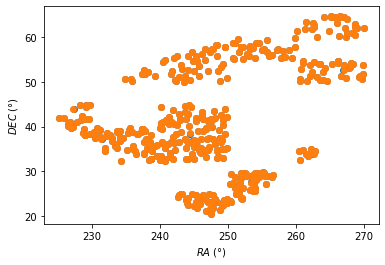

In [38]:
plt.scatter(RA[indexes[:,0]],DEC[indexes[:,0]])
plt.scatter(RA[indexes[:,1]],DEC[indexes[:,1]])
plt.xlabel("$RA\;(\degree$)")
plt.ylabel("$DEC\;(\degree$)")